In [1]:
import json
import osmnx as ox
import pandas as pd
import warnings
import contextily as ctx
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
camps = pd.read_excel('Camps.xlsx') #cleaned file. 
#Orignal download: https://geodata.ehri-project.eu/geonetwork/srv/eng/catalog.search#/metadata/c5a58ab5-2289-425e-83be-3e6e9e7222cf

In [3]:
# Create Geodataframe
geometry = [Point(xy) for xy in zip(camps['LONG'], camps['LAT'])]
camps_gdf = gpd.GeoDataFrame(camps, geometry=geometry, crs="EPSG:4326")

In [4]:
# Define Europe bounding polygon
europe_bounds = Polygon([(-10.601563, 63.505810), (38.363281, 63.505810), (38.363281, 34.456636), (-10.601563, 34.456636)])
europe_gdf = gpd.GeoDataFrame(geometry=[europe_bounds], crs="EPSG:4326")

In [5]:
# Convert to the same CRS
europe_gdf = europe_gdf.to_crs(epsg=3857)
camps_gdf = camps_gdf.to_crs(epsg=3857)

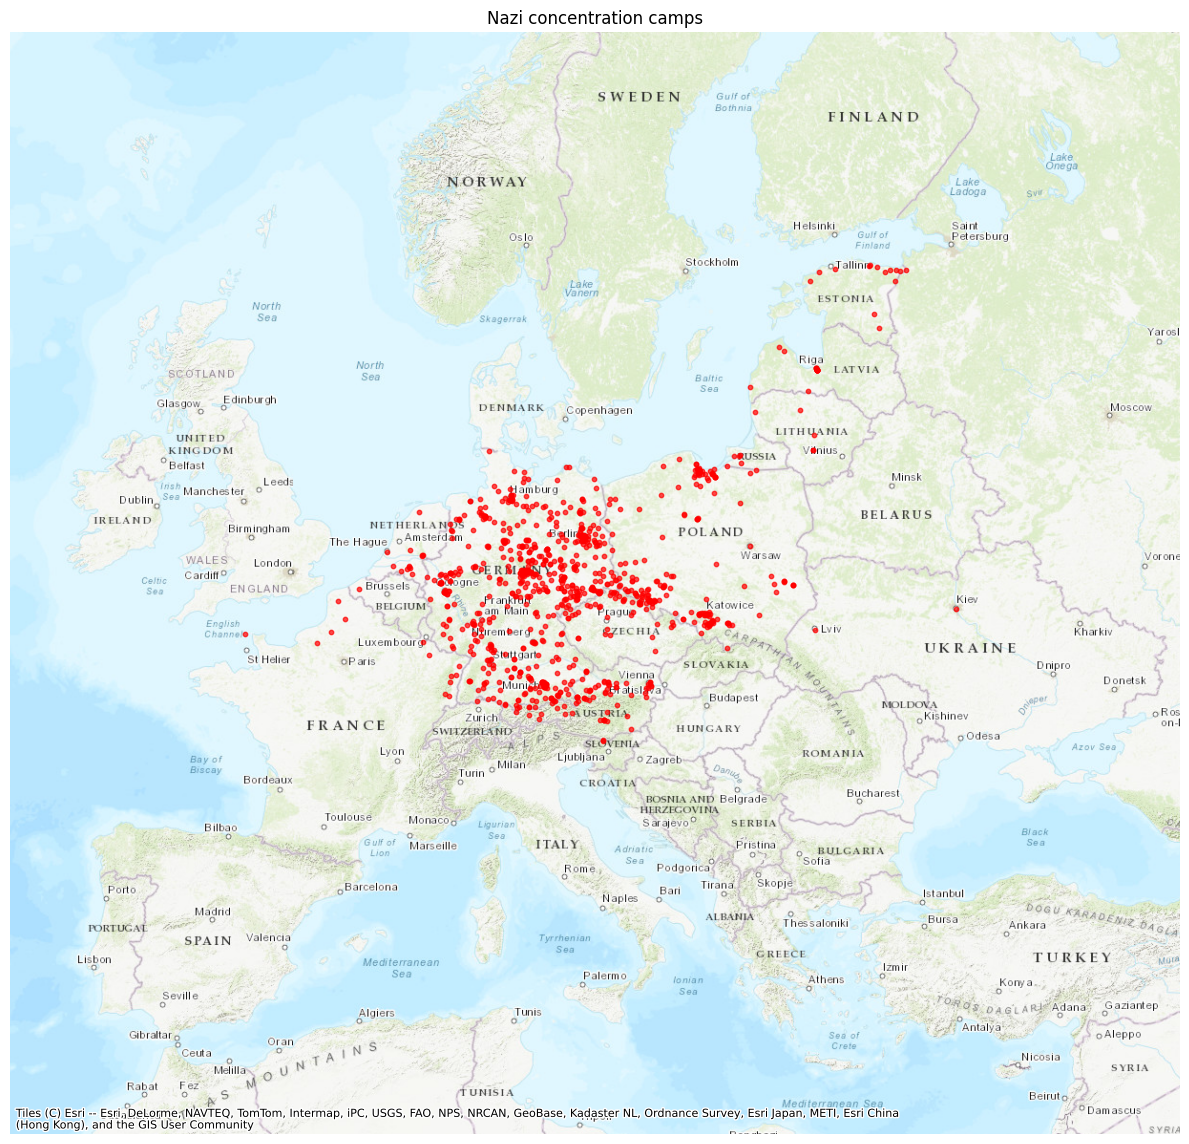

In [7]:
# Plot
fig, ax = plt.subplots(figsize=(12, 12))
europe_gdf.plot(ax=ax, color='none', edgecolor='none', alpha=0)
camps_gdf.plot(ax=ax, markersize=10, color='red', alpha=0.7)

# Add basemap
ctx.add_basemap(ax, crs=camps_gdf.crs, source=ctx.providers.Esri.WorldTopoMap, zoom=5)

# Remove legend and axes
ax.set_xticks([])
ax.set_yticks([])
ax.set_frame_on(False)
plt.title('Nazi concentration camps')

plt.tight_layout()
plt.savefig('Nazi_concentration_camps.png', dpi=300, bbox_inches='tight')
plt.show()